# **Plotting a Tornado**
---

In [2]:
import pyart


fp = "data/KOAX_20211215/KOAX20211215_225459_V06"

# Read the NEXRAD Level II file
radar = pyart.io.read_nexrad_archive(fp)
print(radar.fields.keys())


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

dict_keys(['differential_phase', 'reflectivity', 'cross_correlation_ratio', 'velocity', 'differential_reflectivity', 'clutter_filter_power_removed', 'spectrum_width'])


In [ ]:
grid = pyart.map.grid_from_radars(
    radar,
    grid_shape=(41, 201, 201),
    grid_limits=(
        (
            0.0,
            20000,
        ),
        (-100000.0, 100000.0),
        (-100000, 100000.0),
    ),
)

AttributeError: 'Grid' object has no attribute 'shape'

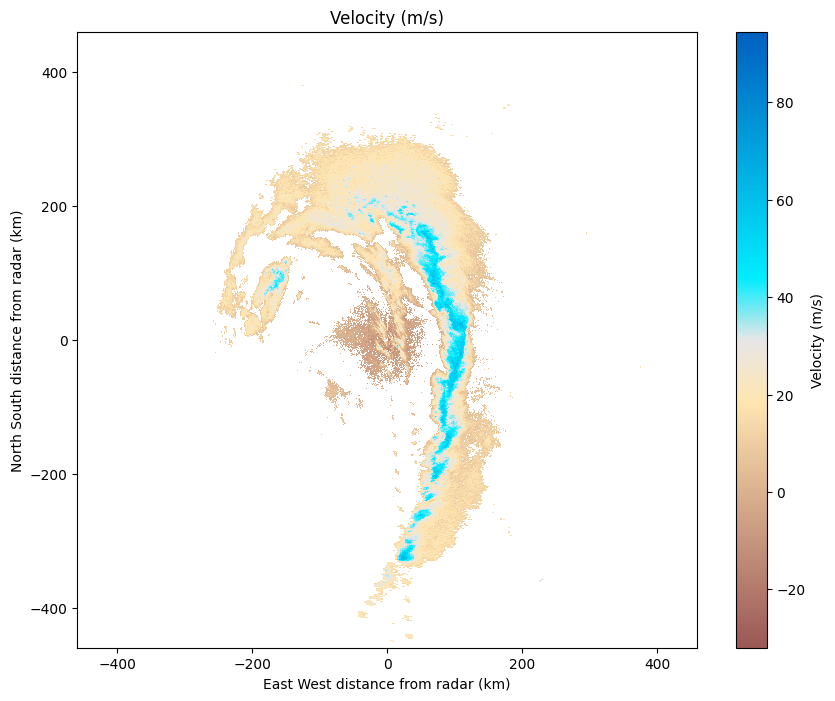

In [6]:
import matplotlib.pyplot as plt


# plot reflectivity
display = pyart.graph.RadarDisplay(radar)
fig, ax = plt.subplots(figsize=(10, 8))
display.plot(
    "reflectivity",
    0,
    ax=ax,
    title="Velocity (m/s)",
    cmap="BlueBrown11_r",  # or try "seismic"
    colorbar_label="Velocity (m/s)",
)
plt.show()

# **Raw NEXRAD LV-II Data**
---

- Each cell in the `(12600, 1832)` shaped original field-arrays corresponds to a **radar gate**: a small unit of atmosphere scanned by a radar.
- NEXRAD radars do not scan on a fixed time-interval
- **Azimuthal**: 0°: north; 90°: east; 180°: south

## **Features**
---
- `cross_correlation_ratio`: $\rho_{HV}$ (Correlation Coefficient)
- `differential_phase`: estimator of rainfall and hail
- `reflectivity` (Z/dBZ): measure of power returning to the radar
- `spectrum_width`: potential indicator of turbulance/mixed precipitation
- `velocity`: wind velo
- `clutter_filter_power_removed`: power removed by built-in clutter filters

In [4]:
# Access the raw data for the "differential_reflectivity" field
differential_reflectivity_data = radar.fields["velocity"]["data"]

# Print the raw data
print(differential_reflectivity_data)

# Optionally, inspect the shape and type of the data
print(f"Data type: {type(differential_reflectivity_data)}")
print(f"Data shape: {differential_reflectivity_data.shape}")

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [11.0 11.0 12.0 ... -- -- --]
 [10.0 12.0 12.5 ... -- -- --]
 [11.5 12.0 13.0 ... -- -- --]]
Data type: <class 'numpy.ma.MaskedArray'>
Data shape: (12600, 1832)


In [5]:
radar.fields["velocity"]["data"].data

array([[-64. , -64. , -64. , ..., -64. , -64. , -64. ],
       [-64. , -64. , -64. , ..., -64. , -64. , -64. ],
       [-64. , -64. , -64. , ..., -64. , -64. , -64. ],
       ...,
       [ 11. ,  11. ,  12. , ..., -64. , -64. , -64. ],
       [ 10. ,  12. ,  12.5, ..., -64. , -64. , -64. ],
       [ 11.5,  12. ,  13. , ..., -64. , -64. , -64. ]],
      shape=(12600, 1832), dtype=float32)

In [10]:
12600 * 12600, 512 * 512 * 3

(158760000, 786432)